# KNN (Nearest Neighbor)

In [1]:
# Import pertinent libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

In [2]:
# Import data
df = pd.read_csv('Classified Data.csv', index_col=0)    

# Take a peek
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
# Get more information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [4]:
# Descriptive statistics
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

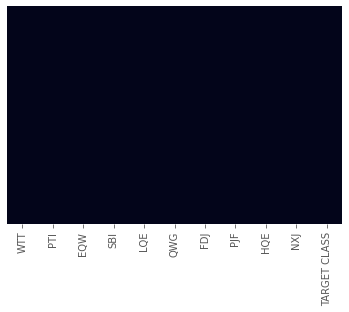

In [5]:
# See if there is any missing data (No data seems to be missing)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
df.isnull().sum()

Because we use unknown features to get features nearest to it, it's best to standardize data set.

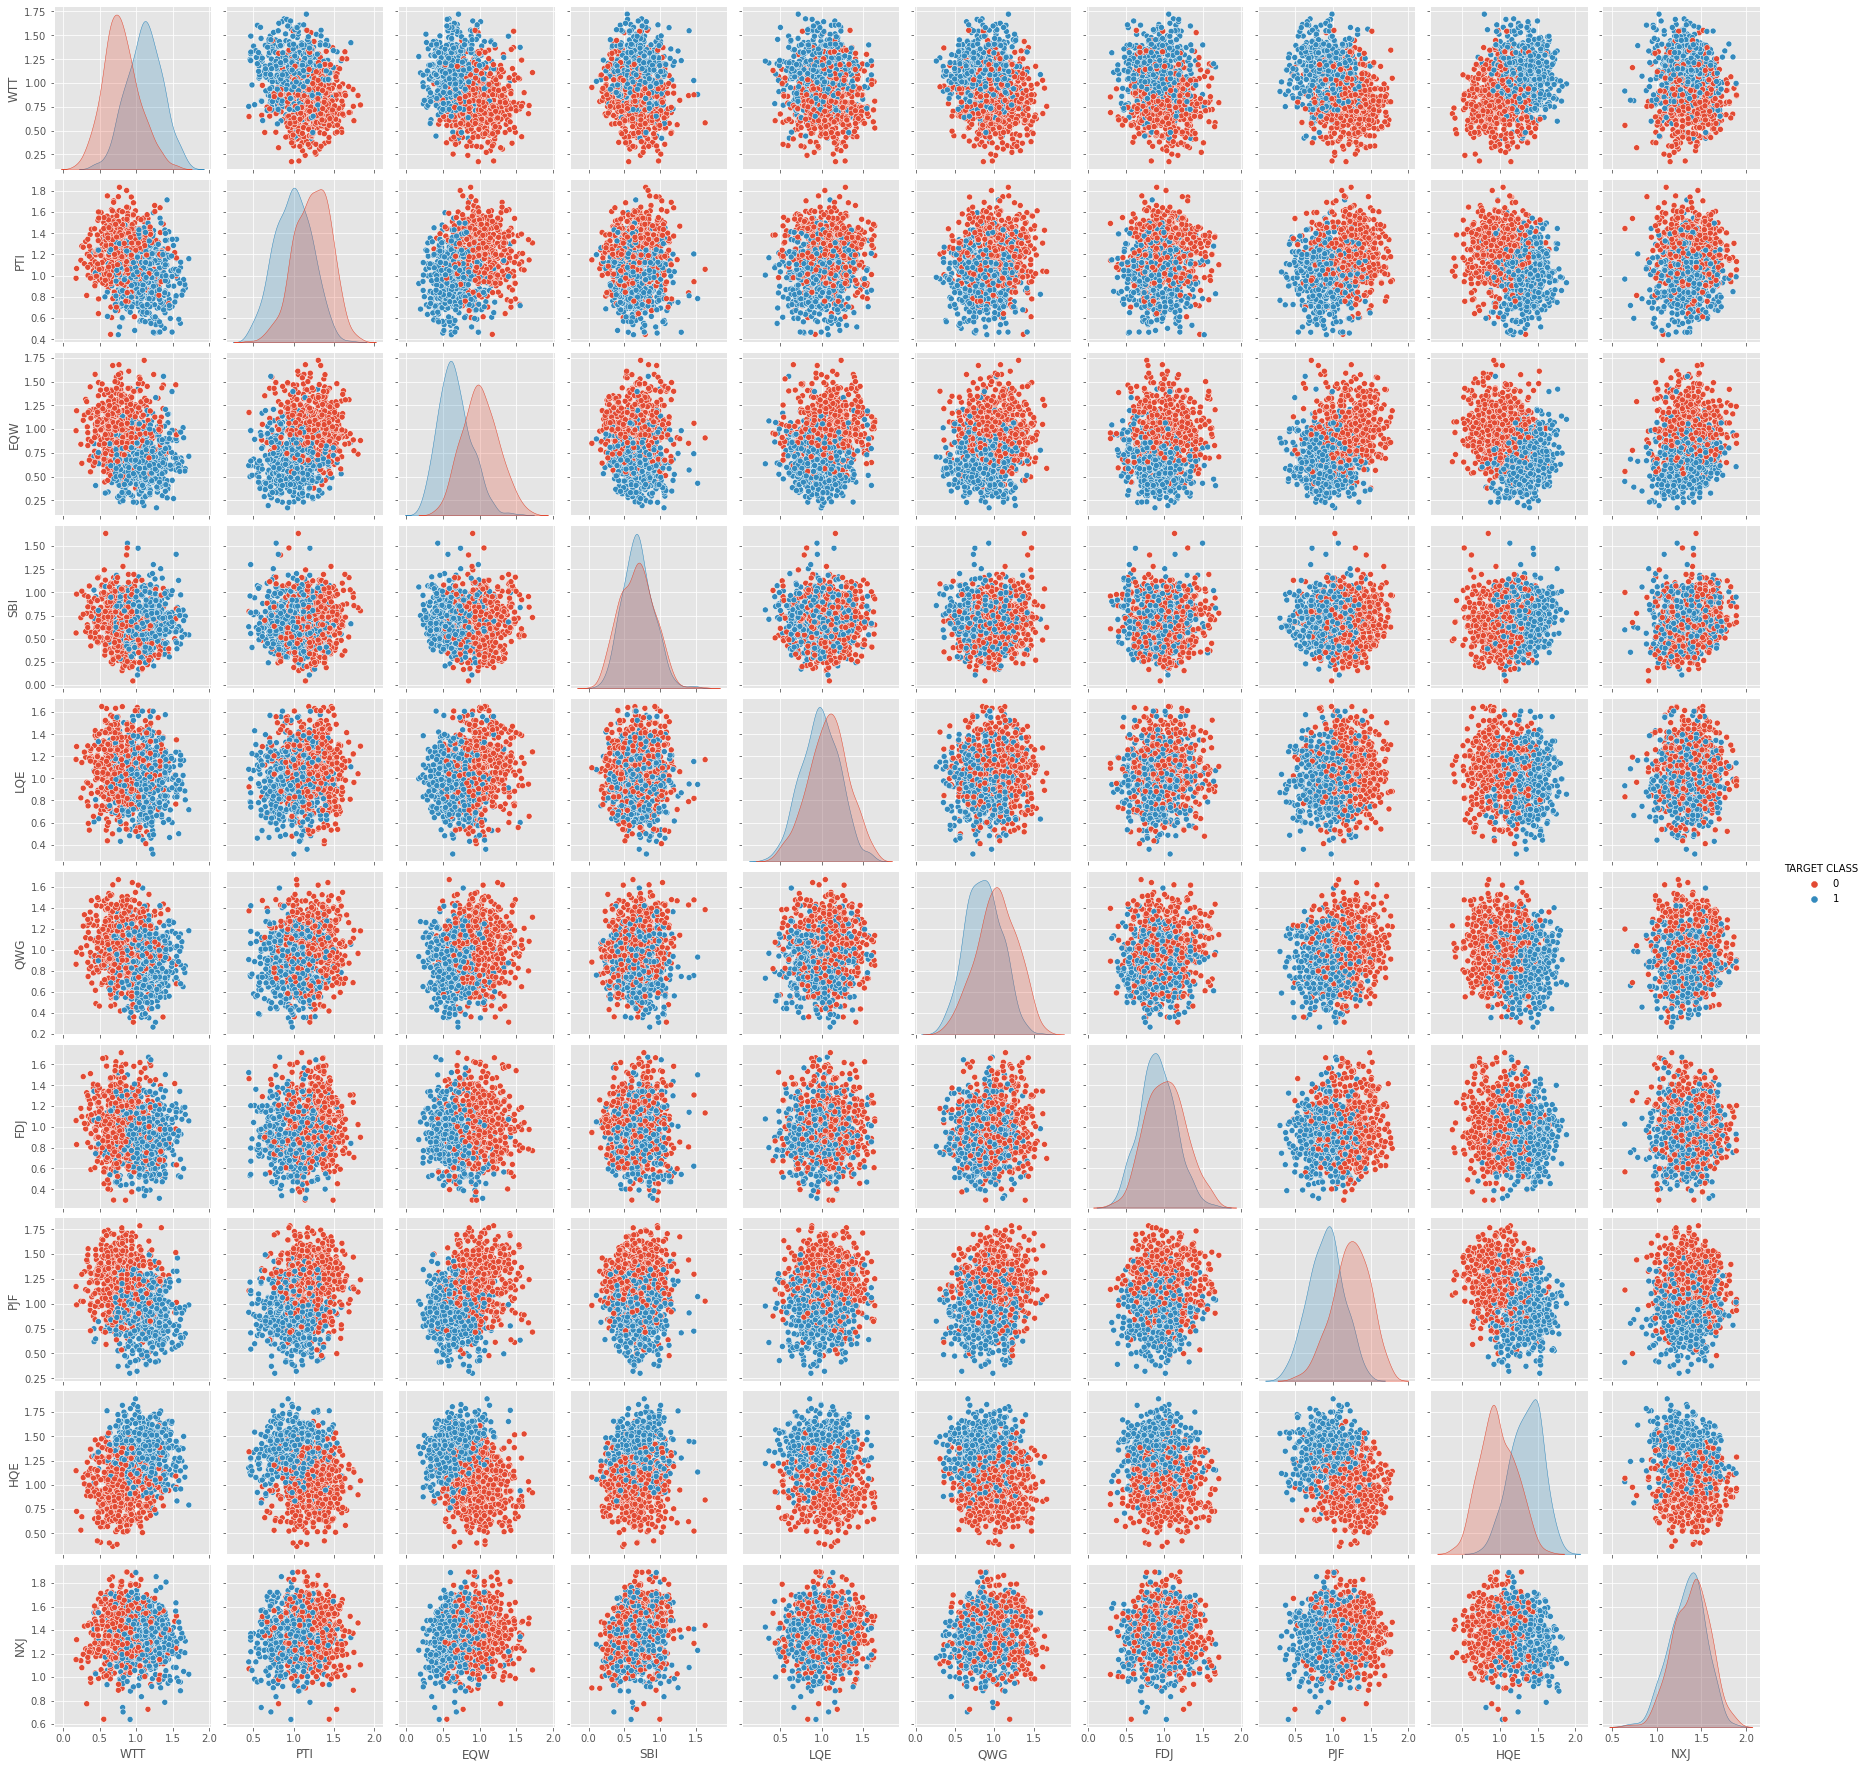

In [6]:
# General overview of features with target class shown
sns.pairplot(df, hue='TARGET CLASS')

In [7]:
# Import standard scalar and create instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
# Fit data to scaler except the feature we are to predict
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [9]:
# Transform
scaled_feat = scaler.transform(df.drop('TARGET CLASS', axis=1))
scaled_feat

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [10]:
# Create a dataframe to include scaled features
df_feat = pd.DataFrame(scaled_feat, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [11]:
from sklearn.model_selection import train_test_split

# Split data using Train Test Split
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=13)

In [12]:
# Create an instance of KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
# Fit model and create predictions
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [14]:
# Import Classification report and confusion matrix to see how well the model did.
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
# Show results
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[155  11]
 [  9 125]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       166
           1       0.92      0.93      0.93       134

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [16]:
# Try to get better results using elbow method
nn = 40
error_rate = []
for x in range(1,nn):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train, y_train)
    pred_x = knn.predict(X_test)
    error_rate.append(np.mean(pred_x != y_test))

Text(0, 0.5, 'Error Rate')

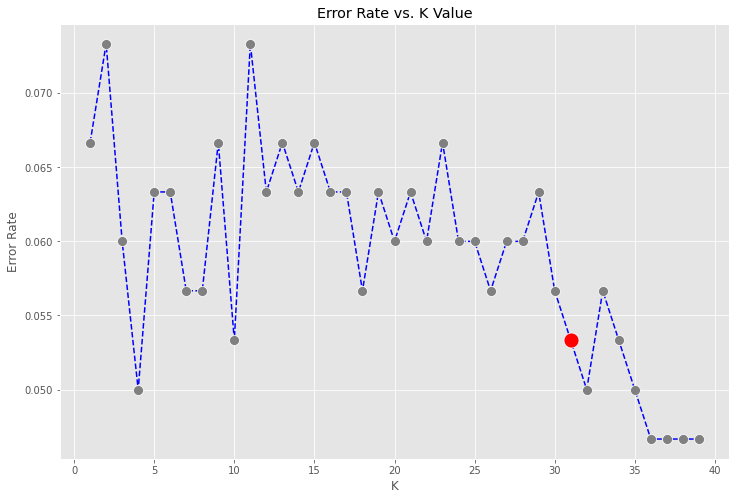

In [17]:
# Show elbow method visually
plt.figure(figsize=(12,8))
sns.lineplot(x=range(1, nn), y=error_rate, color='blue', ls='--', marker='o', markerfacecolor='grey', markersize='10')
sns.lineplot(x=[range(1,nn)[30]], y=error_rate[30], marker='o', markersize=15, markerfacecolor='red')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [18]:
# Show new model results
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[153  13]
 [  3 131]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       166
           1       0.91      0.98      0.94       134

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

